In [115]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import readsav
import pprint

pp = pprint.PrettyPrinter(indent=4).pprint

In [36]:
%ls ../../sambuca/tests/data

error_data.sav                           qbtest_input_spectra.lib
_F1nm_H25_a_Non_UQ02_MB_RC__OS_SHon.sav  qbtest_output_spectra.hdr
forwardModelTestValues.mat               qbtest_output_spectra.lib
no_noise_error_data.sav                  test_error_noise.mat
qbtest_filter_350_900nm.hdr              test_error_no_noise.mat
qbtest_filter_350_900nm.lib              test_optimise_data.mat
qbtest_input_spectra.hdr                 test_resample.mat


In [37]:
data = readsav('../../sambuca/tests/data/_F1nm_H25_a_Non_UQ02_MB_RC__OS_SHon.sav')

/usr/lib/python3.4/site-packages/scipy/io/idl.py:420: UserWarning: Skipping SYSTEM_VARIABLE record
  warnings.warn("Skipping SYSTEM_VARIABLE record")


In [38]:
data.keys()

dict_keys(['iop_a', 'alpha_val', 'topline', 'rat', 'noiserrs', 'water_corrected_mixel', 'realrrs', 'q1', 'rrs', 'h', 'substrater', 'qwater', 'iop_bb', 'lsq', 'zz', 'spectra', 'botline1', 'subsdet_spectral', 'error', 'f_val', '_idlidetempvar_', 'r1', 'sambuca', 'z', 'r2', 'botline2'])

In [39]:
data.spectra[0].dtype.names

('WL',
 'SUBSTRATER',
 'INPUT_SPECTRA',
 'A',
 'BB',
 'R0',
 'R0DP',
 'KD',
 'KUC',
 'KUB')

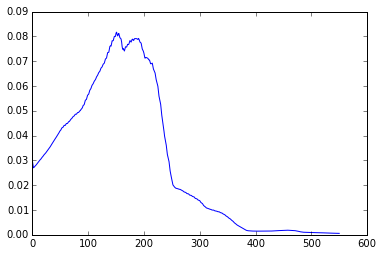

In [40]:
plt.plot(data.spectra[0].R0);

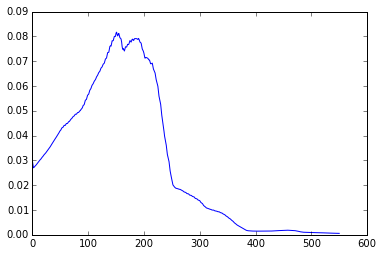

In [53]:
plt.plot(data.spectra[0].R0DP);

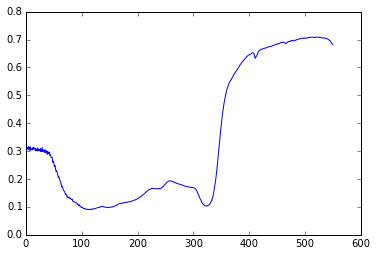

In [41]:
plt.plot(data.spectra[0].substrater);

In [42]:
data.sambuca.dtype.names

('DISTANCES',
 'OPTI_PARAMS',
 'INPUT_PARAMS',
 'IMAGESPECTRA',
 'INPUT_SPECTRA',
 'INPUTR',
 'INPUT_SIOP',
 'WGOSW')

In [43]:
data.sambuca.input_spectra[0].dtype.names

('WL',
 'AWATER',
 'BBWATER',
 'APHY_STAR',
 'ACDOM_STAR',
 'ATR_STAR',
 'BBPH_STAR',
 'BBTR_STAR',
 'CALCULATE_SIOPS',
 'SUBSTRATER')

In [44]:
data.sambuca.input_params[0].dtype.names

('THETA_AIR', 'LAMBDA0CDOM', 'LAMBDA0TR', 'LAMBDA0X')

# Parameters in ZZ

In [45]:
type(data.zz)

numpy.ndarray

In [46]:
len(data.zz)

15

#Substrate Extraction

In [47]:
data.sambuca.inputr[0].dtype.names

('N_SPECTRA', 'SUBS_Z', 'SPECTRA', 'NAMES', 'INDEX')

In [48]:
spectra = data.sambuca.inputr[0].spectra[0]
indicies = data.sambuca.inputr[0].index[0]
substrate1 = spectra[indicies[0]]

In [49]:
data.sambuca.inputr[0].spectra[0][:,0].shape

(551,)

In [50]:
len(data.sambuca.inputr[0].index)

1

#Error data

In [105]:
def print_error_data(ed):
    print("a: {}".format(ed.error_a))
    print("af: {}".format(ed.error_af))
    print("f: {}".format(ed.error_f))
    print("lsq: {}".format(ed.lsq))
    plt.plot(ed.rrs, 'b', label='rrs')
    plt.plot(ed.realrrs, 'g', label='realrrs')
    #plt.plot(ed.noiserrs, 'r', label='noiserrs')
    plt.legend()
    plt.ylim(0, 1.3)
    plt.show()

In [128]:
noise_data = readsav('../../sambuca/tests/data/noise_error_data.sav')
noise_data.keys()

dict_keys(['rrs', 'error_af', 'error_a', 'noiserrs', 'error_f', 'lsq', 'realrrs'])

In [129]:
noise_data.realrrs

array([ 0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00020475,
        0.00020475,  0.00020475,  0.00020475,  0.00020475,  0.00

a: 100.0
af: 1.419616051728013
f: 0.01419616051728013
lsq: 0.0011597589805007438


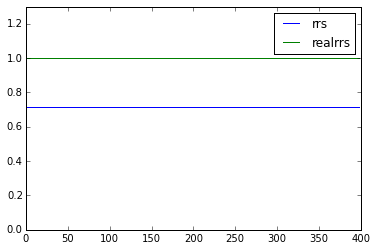

In [107]:
print_error_data(noise_data)

In [55]:
no_noise_data = readsav('../../sambuca/tests/data/no_noise_error_data.sav')
no_noise_data.keys()

dict_keys(['rrs', 'error_af', 'error_a', 'noiserrs', 'error_f', 'lsq', 'realrrs'])

a: 100.0
af: 1.4196161577336561
f: 0.014196161577336561
lsq: 0.0011597589805007438


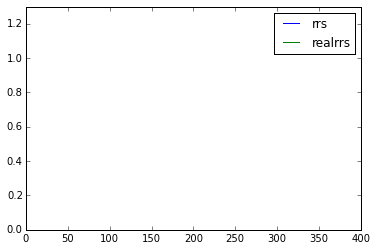

In [108]:
print_error_data(no_noise_data)

In [125]:
realrrs = noise_data.realrrs
rrs = noise_data.rrs
expected_lsq = noise_data.lsq
lsq = np.power(np.sum(np.power(realrrs - rrs, 2)), 0.5)
lsq_np = np.linalg.norm(realrrs - rrs)
print(expected_lsq, lsq, lsq_np)

0.0011597589805 5.66426791115 5.66425


In [123]:
f_val = np.power( np.sum( np.power( realrrs - rrs, 2)), 0.5) / np.sum(realrrs)
f_val_np = np.linalg.norm(realrrs - rrs) / np.sum(realrrs)
f_val_3 = lsq_np / realrrs.sum()
print(f_val, f_val_np, f_val_3)

0.0141961601783 0.0141961 0.0141961


In [124]:
observed_rrs = realrrs
modelled_rrs = rrs
botline1 = np.power(np.sum(np.power(observed_rrs, 2)), 0.5)
botline2 = np.power(np.sum(np.power(modelled_rrs, 2)), 0.5)
botline1_np = np.linalg.norm(observed_rrs)
botline2_np = np.linalg.norm(modelled_rrs)

print(botline1, botline1_np)
print(botline2, botline2_np)

19.9749843554 19.975
14.3107162763 14.3107
